References:

https://cpeg-gcep.net/sites/default/files/upload/bookfiles/CPEG_StatisticalMethods&Models_Jan30.pdf

Data (stat parameters) downloaded from:

https://cpeg-gcep.net/content/who-macro-files-cpeg-revision

z-scores from WHO

https://www.who.int/childgrowth/standards/height_for_age/en/

https://www.who.int/childgrowth/standards/en/

LMS params for Japan

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4860518/pdf/cpe-25-071.pdf

In [1]:
%matplotlib inline

from scipy.optimize.nonlin import NoConvergence
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import seaborn as sns
import scipy.stats as st

# Read in LMS model parameters into a DataFrame `mp`

## WHO Reference Data (5-10 yr, girls&boys)

In [2]:
path = './growth_chart/who2007_R/wfawho2007.txt'
df = pd.read_csv(path, sep='\t')
df['metric'] = 'weight'
df['source'] = 'who_ref'
df.sex = df.sex.replace({1: 'm', 2:'f'})
df.head()

,sex,age,l,m,s,metric,source
0,m,61,-0.2026,18.5057,0.12988,weight,who_ref
1,m,62,-0.2130,18.6802,0.13028,weight,who_ref
2,m,63,-0.2234,18.8563,0.13067,weight,who_ref
3,m,64,-0.2338,19.0340,0.13105,weight,who_ref
4,m,65,-0.2443,19.2132,0.13142,weight,who_ref


In [3]:
df.tail()

,sex,age,l,m,s,metric,source
335,f,226,-0.650933,56.475044,0.148121,weight,who_ref
336,f,227,-0.643695,56.540087,0.148035,weight,who_ref
337,f,228,-0.636417,56.606938,0.147970,weight,who_ref
338,f,229,-0.629107,56.675713,0.147930,weight,who_ref
339,f,230,-0.621771,56.746071,0.147915,weight,who_ref


In [4]:
mp = df

In [5]:
path = './growth_chart/who2007_R/hfawho2007.txt'
df = pd.read_csv(path, sep='\t')
df['metric'] = 'height'
df['source'] = 'who_ref'
df.sex = df.sex.replace({1: 'm', 2:'f'})
df.head()

,sex,age,l,m,s,metric,source
0,m,61,1,110.2647,0.04164,height,who_ref
1,m,62,1,110.8006,0.04172,height,who_ref
2,m,63,1,111.3338,0.04180,height,who_ref
3,m,64,1,111.8636,0.04187,height,who_ref
4,m,65,1,112.3895,0.04195,height,who_ref


In [6]:
df.tail()

,sex,age,l,m,s,metric,source
333,f,225,1,163.1469,0.04019,height,who_ref
334,f,226,1,163.1508,0.04016,height,who_ref
335,f,227,1,163.1534,0.04012,height,who_ref
336,f,228,1,163.1548,0.04009,height,who_ref
337,f,229,1,163.1548,0.04009,height,who_ref


In [7]:
mp = pd.concat([df, mp])

## WHO Standard Data

6 tables total:
* height 0-2yr for girls/boys
* height 2-5yr for girls/boys
* weight 0-5yr for girsl/boys

In [8]:
path = './growth_chart/lhfa_girls_0_2_zscores.txt'
df = pd.read_csv(path, comment='#', sep='\t')
rename = dict(Month='age', L='l', M='m', S='s')
df = df.rename(columns=rename)[rename.values()]
df['sex'] = 'f'
df['metric'] = 'height'
df['source'] = 'who_std'
df.head()

,age,l,m,s,sex,metric,source
0,0,1,49.1477,0.03790,f,height,who_std
1,1,1,53.6872,0.03640,f,height,who_std
2,2,1,57.0673,0.03568,f,height,who_std
3,3,1,59.8029,0.03520,f,height,who_std
4,4,1,62.0899,0.03486,f,height,who_std


In [9]:
df.tail()

,age,l,m,s,sex,metric,source
20,20,1,82.7036,0.03643,f,height,who_std
21,21,1,83.6654,0.03666,f,height,who_std
22,22,1,84.6040,0.03688,f,height,who_std
23,23,1,85.5202,0.03711,f,height,who_std
24,24,1,86.4153,0.03734,f,height,who_std


In [10]:
mp = pd.concat([mp, df.iloc[:-1]])  # remove last row to prevent duplicate

In [11]:
path = './growth_chart/tab_lhfa_girls_p_2_5.txt'
df = pd.read_csv(path, comment='#', sep='\t')
rename = dict(Month='age', L='l', M='m', S='s')
df = df.rename(columns=rename)[rename.values()]
df['sex'] = 'f'
df['metric'] = 'height'
df['source'] = 'who_std'
df.head()

,age,l,m,s,sex,metric,source
0,24,1,85.7153,0.03764,f,height,who_std
1,25,1,86.5904,0.03786,f,height,who_std
2,26,1,87.4462,0.03808,f,height,who_std
3,27,1,88.2830,0.03830,f,height,who_std
4,28,1,89.1004,0.03851,f,height,who_std


In [12]:
df.tail()

,age,l,m,s,sex,metric,source
32,56,1,107.2788,0.04298,f,height,who_std
33,57,1,107.8227,0.04310,f,height,who_std
34,58,1,108.3613,0.04322,f,height,who_std
35,59,1,108.8948,0.04334,f,height,who_std
36,60,1,109.4233,0.04347,f,height,who_std


In [13]:
mp = pd.concat([mp, df])

In [14]:
path = './growth_chart/wfa_girls_0_5_zscores.txt'
df = pd.read_csv(path, comment='#', sep='\t')
rename = dict(Month='age', L='l', M='m', S='s')
df = df.rename(columns=rename)[rename.values()]
df['sex'] = 'f'
df['metric'] = 'weight'
df['source'] = 'who_std'
df.head()

,age,l,m,s,sex,metric,source
0,0,0.3809,3.2322,0.14171,f,weight,who_std
1,1,0.1714,4.1873,0.13724,f,weight,who_std
2,2,0.0962,5.1282,0.13000,f,weight,who_std
3,3,0.0402,5.8458,0.12619,f,weight,who_std
4,4,-0.0050,6.4237,0.12402,f,weight,who_std


In [15]:
df.tail()

,age,l,m,s,sex,metric,source
56,56,-0.3466,17.5136,0.14525,f,weight,who_std
57,57,-0.3479,17.6916,0.14600,f,weight,who_std
58,58,-0.3492,17.8686,0.14675,f,weight,who_std
59,59,-0.3505,18.0445,0.14748,f,weight,who_std
60,60,-0.3518,18.2193,0.14821,f,weight,who_std


In [16]:
mp = pd.concat([mp, df])

In [17]:
path = './growth_chart/lhfa_boys_0_2_zscores.txt'
df = pd.read_csv(path, comment='#', sep='\t')
rename = dict(Month='age', L='l', M='m', S='s')
df = df.rename(columns=rename)[rename.values()]
df['sex'] = 'm'
df['metric'] = 'height'
df['source'] = 'who_std'
df.head()

,age,l,m,s,sex,metric,source
0,0,1,49.8842,0.03795,m,height,who_std
1,1,1,54.7244,0.03557,m,height,who_std
2,2,1,58.4249,0.03424,m,height,who_std
3,3,1,61.4292,0.03328,m,height,who_std
4,4,1,63.8860,0.03257,m,height,who_std


In [18]:
df.tail()

,age,l,m,s,sex,metric,source
20,20,1,84.1996,0.03342,m,height,who_std
21,21,1,85.1348,0.03376,m,height,who_std
22,22,1,86.0477,0.03410,m,height,who_std
23,23,1,86.9410,0.03445,m,height,who_std
24,24,1,87.8161,0.03479,m,height,who_std


In [19]:
mp = pd.concat([mp, df.iloc[:-1]])

In [20]:
path = './growth_chart/lhfa_boys_2_5_zscores.txt'
df = pd.read_csv(path, comment='#', sep='\t')
rename = dict(Month='age', L='l', M='m', S='s')
df = df.rename(columns=rename)[rename.values()]
df['sex'] = 'm'
df['metric'] = 'height'
df['source'] = 'who_std'
df.head()

,age,l,m,s,sex,metric,source
0,24,1,87.1161,0.03507,m,height,who_std
1,25,1,87.9720,0.03542,m,height,who_std
2,26,1,88.8065,0.03576,m,height,who_std
3,27,1,89.6197,0.03610,m,height,who_std
4,28,1,90.4120,0.03642,m,height,who_std


In [21]:
df.tail()

,age,l,m,s,sex,metric,source
32,56,1,107.7697,0.04165,m,height,who_std
33,57,1,108.3198,0.04177,m,height,who_std
34,58,1,108.8689,0.04190,m,height,who_std
35,59,1,109.4170,0.04202,m,height,who_std
36,60,1,109.9638,0.04214,m,height,who_std


In [22]:
mp = pd.concat([mp, df])

In [23]:
path = './growth_chart/wfa_boys_0_5_zscores.txt'
df = pd.read_csv(path, comment='#', sep='\t')
rename = dict(Month='age', L='l', M='m', S='s')
df = df.rename(columns=rename)[rename.values()]
df['sex'] = 'm'
df['metric'] = 'weight'
df['source'] = 'who_std'
df.head()

,age,l,m,s,sex,metric,source
0,0,0.3487,3.3464,0.14602,m,weight,who_std
1,1,0.2297,4.4709,0.13395,m,weight,who_std
2,2,0.1970,5.5675,0.12385,m,weight,who_std
3,3,0.1738,6.3762,0.11727,m,weight,who_std
4,4,0.1553,7.0023,0.11316,m,weight,who_std


In [24]:
df.tail()

,age,l,m,s,sex,metric,source
56,56,-0.1387,17.6768,0.13261,m,weight,who_std
57,57,-0.1417,17.8422,0.13325,m,weight,who_std
58,58,-0.1447,18.0073,0.13389,m,weight,who_std
59,59,-0.1477,18.1722,0.13453,m,weight,who_std
60,60,-0.1506,18.3366,0.13517,m,weight,who_std


In [25]:
mp = pd.concat([mp, df])

In [26]:
mp['country'] = 'who'

In [27]:
path = './growth_chart/height_lms_jp.txt'
usecols = ['year', 'l', 'm', 's']
cols = ['year', 'l', 'm', 's', '_1', '_2', '_3']
f1 = pd.read_csv(path, sep='\t', skiprows=7, names=cols, usecols=usecols)
f1['sex'] = 'm'
cols = ['year', '_1', '_2', '_3', 'l', 'm', 's']
f2 = pd.read_csv(path, sep='\t', skiprows=7, names=cols, usecols=usecols)
f2['sex'] = 'f'
df = pd.concat([f1, f2])
df['age'] = (df.year * 12).astype(int)
df = df.drop('year', axis=1)
df['source'] = 'jp'
df['metric'] = 'height'
df['country'] = 'jp'
df.head()

,l,m,s,sex,age,source,metric,country
0,2.300,49.0,0.0417,m,0,jp,height,jp
1,2.212,61.5,0.0378,m,3,jp,height,jp
2,2.124,67.7,0.0351,m,6,jp,height,jp
3,2.036,71.6,0.0335,m,9,jp,height,jp
4,1.948,74.8,0.0328,m,12,jp,height,jp


In [28]:
mp = pd.concat([mp, df])

In [29]:
path = './growth_chart/weight_lms_jp.txt'
usecols = ['year', 'l', 'm', 's']
cols = ['year', 'l', 'm', 's', '_1', '_2', '_3']
f1 = pd.read_csv(path, sep='\t', skiprows=7, names=cols, usecols=usecols)
f1['sex'] = 'm'
cols = ['year', '_1', '_2', '_3', 'l', 'm', 's']
f2 = pd.read_csv(path, sep='\t', skiprows=7, names=cols, usecols=usecols)
f2['sex'] = 'f'
df = pd.concat([f1, f2])
df['age'] = (df.year * 12).astype(int)
df = df.drop('year', axis=1)
df['source'] = 'jp'
df['metric'] = 'weight'
df['country'] = 'jp'
df.head()

,l,m,s,sex,age,source,metric,country
0,0.774,3.00,0.149,m,0,jp,weight,jp
1,0.490,6.31,0.131,m,3,jp,weight,jp
2,0.262,7.93,0.119,m,6,jp,weight,jp
3,0.082,8.80,0.110,m,9,jp,weight,jp
4,-0.062,9.38,0.105,m,12,jp,weight,jp


In [30]:
f1.tail()

,year,l,m,s,sex
35,15.5,-0.952,57.5,0.161,m
36,16.0,-1.127,58.8,0.155,m
37,16.5,-1.325,59.7,0.151,m
38,17.0,-1.534,60.4,0.147,m
39,17.5,-1.739,60.9,0.141,m


In [31]:
mp = pd.concat([mp, df])

In [32]:
# Take out age 230 ... it makes down stream code simpler
assert (mp.age == 230).sum() == 2
mp = mp.loc[mp.age != 230]

In [33]:
# Make sure we have no duplicates
cols = ['sex', 'age', 'metric', 'country']
assert not mp[cols].duplicated().any()

# Core function

In [34]:
def _get_metric(percentile, sex, agemo, metric, country='who'):
    rows = mp.query('sex==@sex and age==@agemo and country==@country and metric==@metric')
    assert len(rows) == 1, (rows, (percentile, sex, agemo, metric, country))
    r = rows.iloc[0]
    l, m, s = r['l'], r['m'], r['s']
    target_z = st.norm.ppf(percentile)
    def F(value):
        if l == 0:
            return np.log(value / m) / s - target_z
        return ((value / m) ** l - 1) / (s * l) - target_z
    value = scipy.optimize.broyden1(F, [m], f_tol=1e-4)
    return value[0]


def get_weight(percentile, sex, agemo, country='who'):
    return _get_metric(percentile, sex, agemo, 'weight', country)


def get_height(percentile, sex, agemo, country='who'):
    return _get_metric(percentile, sex, agemo, 'height', country)

sex = 'f'
agemo = 5 * 12 + 1
get_weight(0.5, sex, agemo), get_height(0.5, sex, agemo)

(18.2579, 109.6016)

# Get weights and heights at various percentiles over all ages

In [35]:
percentiles = np.array([3, 15, 50, 85, 97]) / 100
rows = []

cols = ['sex', 'age']
sex_age = mp.loc[mp.country == 'who'][cols].drop_duplicates().values

In [36]:
rows = []
for (sex, agemo), percentile in itertools.product(sex_age, percentiles):
    try:
        weight = get_weight(percentile, sex, agemo)
    except NoConvergence:
        weight = np.nan
    try:
        height = get_height(percentile, sex, agemo)
    except NoConvergence:
        height = np.nan
    rows.append(dict(weight=weight, height=height,
                     percentile=percentile, sex=sex, agemo=agemo))

df = pd.DataFrame(rows)
df['year'] = df.agemo / 12

# Plot

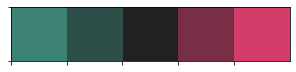

In [37]:
colors = sns.diverging_palette(250, 300, sep=10, n=len(percentiles), center="dark")
colors = sns.diverging_palette(170, 300, sep=10, n=len(percentiles), center="dark")
colors = sns.diverging_palette(170, 360, sep=10, n=len(percentiles), center="dark")
sns.palplot(colors)

In [38]:

def fmt_inset(ax, c, xlabel, ylabel, xlims, ylims):
    ax.set_facecolor('none')
    ax.set_xlim(*xlims)
    ax.set_ylim(*ylims)
    ax.tick_params(color=c, labelcolor=c)
    for y in list(range(ylims[0], ylims[1]+1, 10))[1:-1]:
        ax.axhline(y, color=c, lw=3, ls='--', alpha=0.5)
    for x in list(range(xlims[0], xlims[1]+1, 2))[1:-1]:
        ax.axvline(x, color=c, lw=3, ls='--', alpha=0.5)
    for spine in ax.spines.values():
        spine.set_edgecolor(c)
        spine.set_linewidth(6)
        spine.set_alpha(0.6)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.xaxis.label.set_color(c)
    ax.yaxis.label.set_color(c)
    return

In [39]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

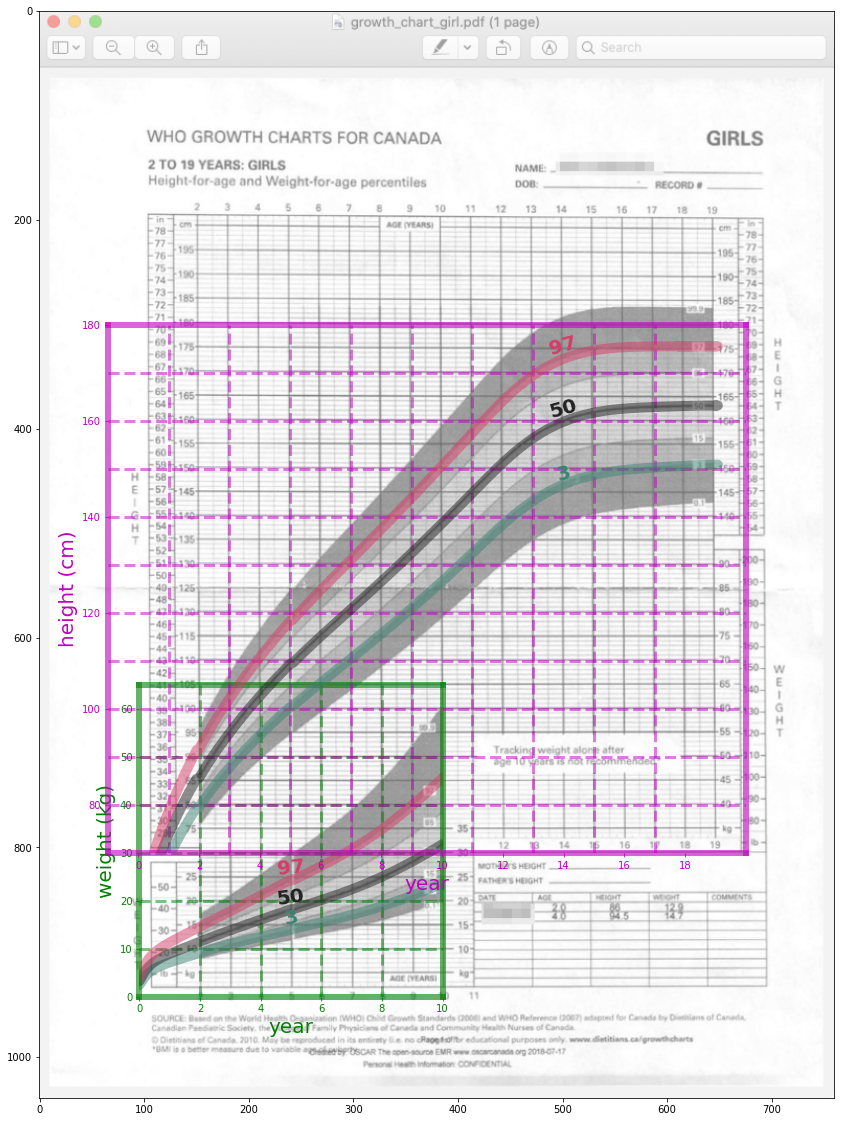

In [40]:
fig, _ax = plt.subplots(figsize=(20, 20), facecolor='w')
img = plt.imread('./growth_chart/growth_chart_girl_canada_scan.png')

_ax.imshow(img, interpolation='bilinear', alpha=0.6)
# ax.axis('off')
# ax.set_yticks([]), ax.set_yticklabels([])
# ax.set_xticks([]), ax.set_xticklabels([])

ax = inset_axes(_ax, width="100%", height="100%",
                bbox_to_anchor=(100, 640, 290, 298), # l, t, w, h
                bbox_transform=_ax.transData,
                )
fmt_inset(ax, 'green', 'age (year)', 'weight (kg)', (0, 10), (0, 65))
    
gby = (df
       .query('sex=="f" and year<=10')
       .set_index('year')
       .sort_values('weight')
       .groupby('percentile'))

k = dict(lw=10, alpha=0.5, solid_capstyle='round')

for j, (pct, dg) in enumerate(gby):
    if pct not in [0.03, 0.5, 0.97]:
        continue
    c = colors[j]
    dg.weight.plot(ax=ax, color=c, **k)
    x = 5
    y = dg.loc[x].weight
    x1, x2 = x-1/12, x+1/12
    y1, y2 = dg.loc[x1].weight, dg.loc[x2].weight
    slope = (y2-y1)/(x2-x1)
    rot, offset = slope * 6, slope / 13  # magic
    ax.text(x, y+offset, f'{pct*100:.0f}', color=c,
            va='bottom', ha='center', size=20,
            fontdict=dict( rotation=rot, size='large', weight='bold', ))
    
ax = inset_axes(_ax, width="100%", height="100%",
                bbox_to_anchor=(70, 295, 610, 506), # l, t, w, h
                bbox_transform=_ax.transData,
                )
fmt_inset(ax, 'm', 'age (year)', 'height (cm)', (-1, 20), (70, 180))
ax.set_xticks(range(0, 20, 2))
    
gby = (df
       .query('sex=="f"')
       .set_index('year')
       .sort_values('height')
       .groupby('percentile'))

k = dict(lw=10, alpha=0.5, solid_capstyle='round')

for j, (pct, dg) in enumerate(gby):
    if pct not in [0.03, 0.5, 0.97]:
        continue
    c = colors[j]
    dg.height.plot(ax=ax, color=c, **k)
    x = 14
    y = dg.loc[x].height
    x1, x2 = x-1/12, x+1/12
    y1, y2 = dg.loc[x1].height, dg.loc[x2].height
    slope = (y2-y1)/(x2-x1)
    rot, offset = slope * 6, 0#slope / 13  # magic
    ax.text(x, y+offset, f'{pct*100:.0f}', color=c,
            va='bottom', ha='center', size=20,
            fontdict=dict( rotation=rot, size='large', weight='bold', ))
    
plt.show()

In [41]:
sex = 'f'
agemo = 5 * 12 + 6

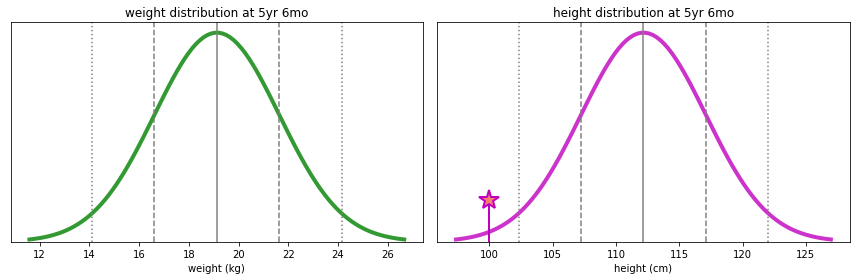

In [42]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)

def _do(ax, mean, sigma, color):
    x = np.linspace(mean-3*sigma, mean+3*sigma, 100)
    y = st.norm.pdf(x, mean, sigma)
    y = y / y.max()
    ax.plot(x, y, color=color, lw=4, alpha=0.8)
    ax.axvline(mean, color='grey')
    for sign in [-1, 1]:
        ax.axvline(mean+sign*sigma, color='grey', ls='--')
        ax.axvline(mean+sign*2*sigma, color='grey', ls=':')
    ax.set_ylim(bottom=0)
    ax.set_yticks([])
    ax.set_yticklabels([])
    
y, m = agemo // 12, agemo % 12

ax = axes[0]
mean = get_weight(0.5, sex, agemo)
sigma = mean - get_weight(st.norm.cdf(-1), sex, agemo)
_do(ax, mean, sigma, 'g')
ax.set_xlabel('weight (kg)')
ax.set_title(f'weight distribution at {y}yr {m}mo')

ax = axes[1]
mean = get_height(0.5, sex, agemo)
sigma = mean - get_height(st.norm.cdf(-1), sex, agemo)
_do(ax, mean, sigma, 'm')
ax.plot([100, 100], [0, 0.2], "-", c='m', lw=2, alpha=1)
ax.plot(100, 0.2, "*", ms=20, mec='m', mfc='salmon', mew=2)
ax.set_xlabel('height (cm)')
ax.set_title(f'height distribution at {y}yr {m}mo')

plt.tight_layout()
plt.show()

In [43]:
path = "./growth_chart/Set-1-HFA-WFA_2-19_BOYS_EN.png"
img_boy = plt.imread(path)
path = "./growth_chart/Set-1-HFA-WFA_2-19_GIRLS_EN_Extended.png"
img_girl = plt.imread(path)

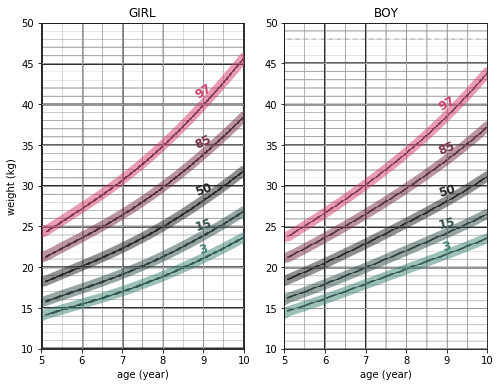

In [44]:
fig, axes = plt.subplots(figsize=(8, 6), ncols=2)
imgs = [img_girl, img_boy]
for i, sex in enumerate('fm'):
    ax = axes[i]
    gby = (df.loc[df.sex==sex]
           .query('year<=10')
           .set_index('year')
           .groupby('percentile')
           )
    k = dict(lw=10, alpha=0.5, solid_capstyle='round')
    for j, (pct, dg) in enumerate(gby):
        c = colors[j]
        dg.weight.sort_values().plot(ax=ax, color=c, **k)
        x = 9
        y = dg.loc[x].weight
        x1, x2 = x-1/12, x+1/12
        y1, y2 = dg.loc[x1].weight, dg.loc[x2].weight
        slope = (y2-y1)/(x2-x1)
        rot, offset = slope * 6, slope / 13  # magic
        ax.text(x, y+offset, f'{pct*100:.0f}', color=c,
                va='bottom',
                ha='center',
                fontdict=dict(
                    rotation=rot,
                    size='large',
                    weight='bold',
                ))
        
    ax.grid()
    ax.set_xlim(5, 10)
    ax.set_ylim(10, 50)
    ax.imshow(imgs[i], extent=(5, 10, 10, 50), aspect='auto')
    ax.set_title('GIRL' if sex == 'f' else 'BOY')
    if i == 0:
        ax.set_ylabel('weight (kg)')
    ax.set_xlabel('age (year)')
plt.show()

# Get weights and heights at various percentiles over all ages

In [45]:
percentiles = np.array([3, 15, 50, 85, 97]) / 100
rows = []

cols = ['sex', 'age']
sex_age = mp.loc[mp.country == 'jp'][cols].drop_duplicates().values

In [46]:
rows = []
for (sex, agemo), percentile in itertools.product(sex_age, percentiles):
    try:
        weight = get_weight(percentile, sex, agemo, country='jp')
    except NoConvergence:
        weight = np.nan
    try:
        height = get_height(percentile, sex, agemo, country='jp')
    except NoConvergence:
        height = np.nan
    rows.append(dict(weight=weight, height=height,
                     percentile=percentile, sex=sex, agemo=agemo))

dj = pd.DataFrame(rows)
dj['year'] = dj.agemo / 12

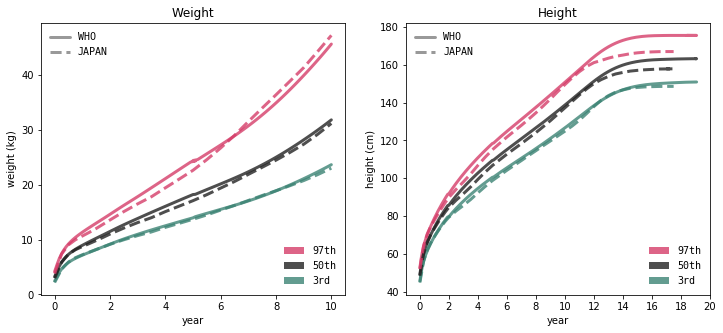

In [47]:
    
fig, axes = plt.subplots(figsize=(12, 5), facecolor='w', ncols=2)

k = dict(lw=3, alpha=0.8, solid_capstyle='round')
percentiles_to_plot = [0.03, 0.5, 0.97]
def add_legend(ax):
    
    handles = [plt.Rectangle((0,0),1,1, facecolor=c, alpha=k['alpha'], edgecolor='none')
               for c, p in zip(colors, percentiles) if p in percentiles_to_plot][::-1]
    labels = ['3rd', '50th', '97th'][::-1]
    leg1 = ax.legend(handles, labels, loc='lower right', frameon=False,
              prop=dict(family='monospace'))
    
    labels= ['WHO', 'JAPAN']
    handles = [
        plt.Line2D((0,1),(0,0), color='grey', ls='-', **k),
        plt.Line2D((0,1),(0,0), color='grey', ls='--', **k),
    ]
    ax.legend(handles, labels, loc='upper left', frameon=False,
              prop=dict(family='monospace'))
    ax.add_artist(leg1)
    return

ax = axes[0]
for i, f in enumerate([df, dj]):
    gby = (f
           .query('sex=="f" and year<=10')
           .set_index('year')
           .sort_values('weight')
           .groupby('percentile'))

    for j, (pct, dg) in enumerate(gby):
        if pct not in percentiles_to_plot:
            continue
        c = colors[j]
        ls = ['-', '--'][i]
        line = dg.weight.plot(ax=ax, color=c, ls=ls, **k)
ax.set_ylabel('weight (kg)')
ax.set_title('Weight')
add_legend(ax)

ax = axes[1]
for i, f in enumerate([df, dj]):
    gby = (f
           .query('sex=="f"')
           .set_index('year')
           .sort_values('height')
           .groupby('percentile'))

    for j, (pct, dg) in enumerate(gby):
        if pct not in percentiles_to_plot:
            continue
        c = colors[j]
        ls = ['-', '--'][i]
        dg.height.plot(ax=ax, color=c, ls=ls, **k)
ax.set_xticks(range(0, 21, 2))
ax.set_ylabel('height (cm)')
ax.set_title('Height')
add_legend(ax)
plt.show()

In [48]:
sex = 'f'
agemo = 5 * 12 + 6
percentile = st.norm.cdf(-1)
target_z = st.norm.ppf(percentile)

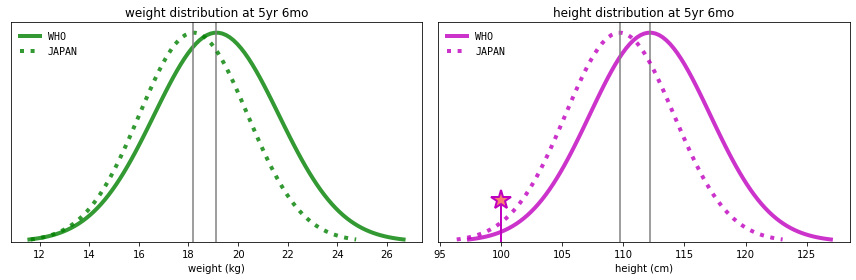

In [49]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)

def _do(ax, mean, sigma, color, ls, label):
    x = np.linspace(mean-3*sigma, mean+3*sigma, 100)
    y = st.norm.pdf(x, mean, sigma)
    y = y / y.max()
    ax.plot(x, y, color=color, lw=4, alpha=0.8, ls=ls, label=label)
    ax.axvline(mean, color='grey')
    ax.set_ylim(bottom=0)
    ax.set_yticks([])
    ax.set_yticklabels([])
    
y, m = agemo // 12, agemo % 12

ax = axes[0]
mean = get_weight(0.5, sex, agemo)
sigma = mean - get_weight(st.norm.cdf(-1), sex, agemo)
_do(ax, mean, sigma, 'g', '-', 'WHO')
mean = get_weight(0.5, sex, agemo, country='jp')
sigma = mean - get_weight(percentile, sex, agemo, country='jp')
_do(ax, mean, sigma, 'g', ':', 'JAPAN')
ax.set_xlabel('weight (kg)')
ax.set_title(f'weight distribution at {y}yr {m}mo')
ax.legend(loc='upper left', frameon=False,
          prop=dict(family='monospace'))

ax = axes[1]
mean = get_height(0.5, sex, agemo)
sigma = mean - get_height(st.norm.cdf(-1), sex, agemo)
_do(ax, mean, sigma, 'm', '-', 'WHO')
mean = get_height(0.5, sex, agemo, country='jp')
sigma = mean - get_height(percentile, sex, agemo, country='jp')
_do(ax, mean, sigma, 'm', ':', 'JAPAN')
ax.set_xlabel('weight (kg)')
ax.plot([100, 100], [0, 0.2], "-", c='m', lw=2, alpha=1)
ax.plot(100, 0.2, "*", ms=20, mec='m', mfc='salmon', mew=2)
ax.set_xlabel('height (cm)')
ax.set_title(f'height distribution at {y}yr {m}mo')
ax.legend(loc='upper left', frameon=False,
          prop=dict(family='monospace'))

plt.tight_layout()
plt.show()

In [50]:
mean = get_height(0.5, sex, agemo)
sigma = mean - get_height(st.norm.cdf(-1), sex, agemo)
percentile = st.norm.cdf(100, loc=mean, scale=sigma)
z_score = st.norm.ppf(percentile)
f'{percentile:.1%}', z_score

('0.7%', -2.467336988435356)

In [51]:
mean = get_height(0.5, sex, agemo, country='jp')
sigma = mean - get_height(st.norm.cdf(-1), sex, agemo, country='jp')
percentile = st.norm.cdf(100, loc=mean, scale=sigma)
z_score = st.norm.ppf(percentile)
f'{percentile:.1%}', z_score

('1.5%', -2.1833157296415875)